In [1]:
# Importando bibliotecas
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from minisom import MiniSom

from matplotlib import pyplot as plt
from pylab import pcolor, colorbar, plot

In [2]:
# Lendo dados
data = pd.read_csv("../Databases/wines.csv")

### Pre-processamento

In [3]:
# Separacao de features e label;
X = data.iloc[:, 1:14] # features
y = data.iloc[:, 0] # label

# Realizando normalizacao das features, para que estejam entre 0 e 1;
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)

### Treinando Modelo

In [4]:
# Criando modelo;
mapSom = MiniSom(x=8,y=8, # Matriz de neuronios;
                 input_len=13, # Numero de entradas;
                 sigma=1.0, # Raio;
                 learning_rate=0.1, # Taxa de aprendizagem;
                 random_seed=2) # Semente aleatoria;

mapSom.random_weights_init(X) # Inicia os pessos dos neuronios;
mapSom.train_random(data=X, num_iteration = 100) # Treinamento;

In [5]:
# Pesos;
# mapSom._weights

# Valores do mapa auto-organizavel
# mapSom._activation_map

values_BMU = mapSom.activation_response(X)

### Visualizacao

<ipython-input-6-db055238d6f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[ y == 1] = 0
<ipython-input-6-db055238d6f9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[ y == 2] = 1
<ipython-input-6-db055238d6f9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[ y == 3] = 2
<ipython-input-6-db055238d6f9>:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor

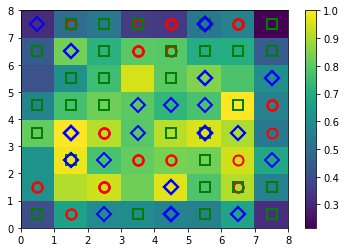

In [6]:
# plt.figure(figsize=(15,10))
pcolor(mapSom.distance_map().T);
colorbar();

makers =['o','s','D'] 
color = ['r', 'g', 'b']

y[ y == 1] = 0
y[ y == 2] = 1
y[ y == 3] = 2

for i, x in enumerate(X):
    winner = mapSom.winner(x)
    plt.plot(winner[0] + 0.5, winner[1] +0.5, makers[y[i]],
            markerfacecolor = 'None', markersize=10,
            markeredgecolor=color[y[i]], markeredgewidTh=2);